# Initialisation

In [3]:
import numpy as np, pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure


# Chargement des données

In [4]:
df_bls=pd.read_csv("Scripts-GCP/outputs/output_bls.csv")
df_ecdsa=pd.read_csv("Scripts-GCP/outputs/output_ecdsa.csv")

## Aperçu des données

In [5]:
df_bls.describe()

,t,n,message_size,signature_size,signature_duration,verification_duration
count,19.000000,19.000000,19.000000,19.0,19.000000,19.000000
mean,7.368421,12.105263,90.947368,96.0,8.174017,0.245901
std,3.932917,5.086963,32.464466,0.0,5.177854,0.090862
min,2.000000,5.000000,64.000000,96.0,0.965302,0.160613
25%,4.000000,10.000000,64.000000,96.0,4.796919,0.163006
50%,7.000000,10.000000,64.000000,96.0,5.473779,0.224141
75%,10.000000,15.000000,128.000000,96.0,11.612257,0.287321
max,16.000000,20.000000,128.000000,96.0,17.289394,0.449393


In [6]:
df_ecdsa.describe()

,t,n,keygen duration,message_size,signature_size,sign_duration
count,27.000000,27.000000,27.000000,27.0,27.000000,27.000000
mean,7.148148,11.518519,4.520380,64.0,142.777778,3.420305
std,4.580088,6.078780,7.470678,0.0,0.506370,6.029685
min,1.000000,3.000000,0.002821,64.0,141.000000,0.001659
25%,4.000000,5.000000,0.008821,64.0,143.000000,0.004869
50%,7.000000,10.000000,0.018989,64.0,143.000000,0.008116
75%,9.000000,17.500000,8.024803,64.0,143.000000,5.246603
max,16.000000,20.000000,25.142170,64.0,143.000000,22.559974


# Quelques mesures

In [19]:
THRESHOLD_VALUES=[0.3,0.6,0.75]
def filter_by_threshold(df):
    return [df[(pd.Series(df['n']*t,dtype='int32')+1 == df['t']) ].sort_values(by=['n']) for t in THRESHOLD_VALUES]

## Tailles des signatures en fonction de n et t

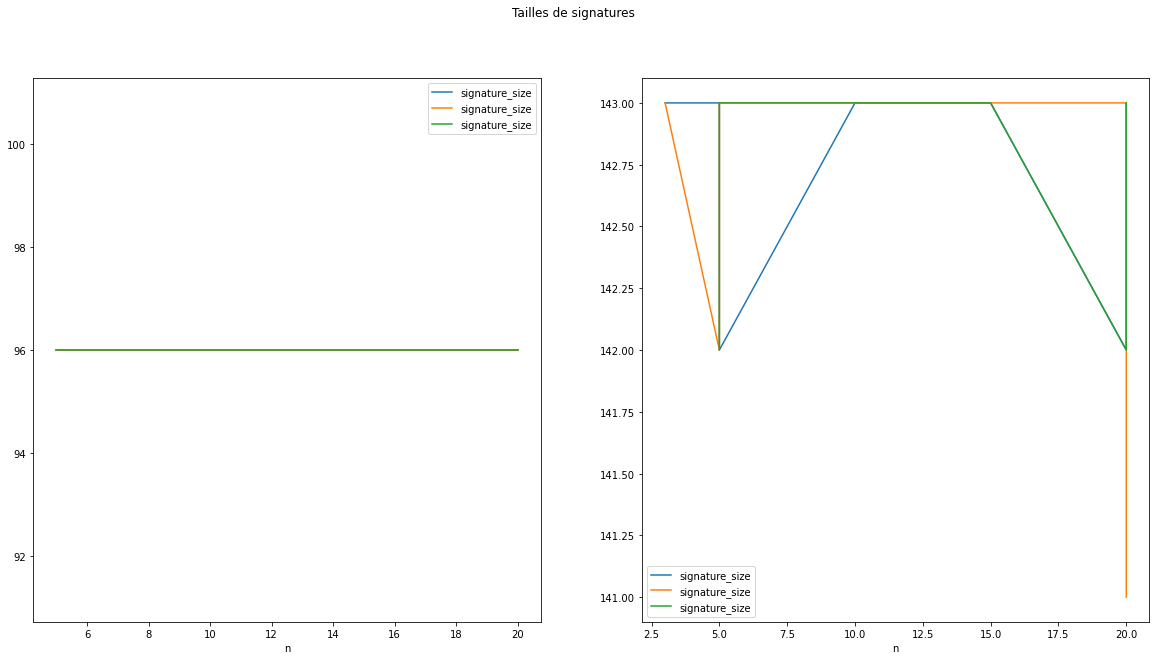

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 10))
fig.suptitle("Tailles de signatures")
ssizes_bls,ssizes_ecdsa=filter_by_threshold(df_bls),filter_by_threshold(df_ecdsa)

for i in range(len(THRESHOLD_VALUES)):
    ssizes_bls[i].plot("n","signature_size",ax=ax1)
    ssizes_ecdsa[i].plot("n","signature_size",ax=ax2)
    

## Duréé de génaration des clés pour ecdsa

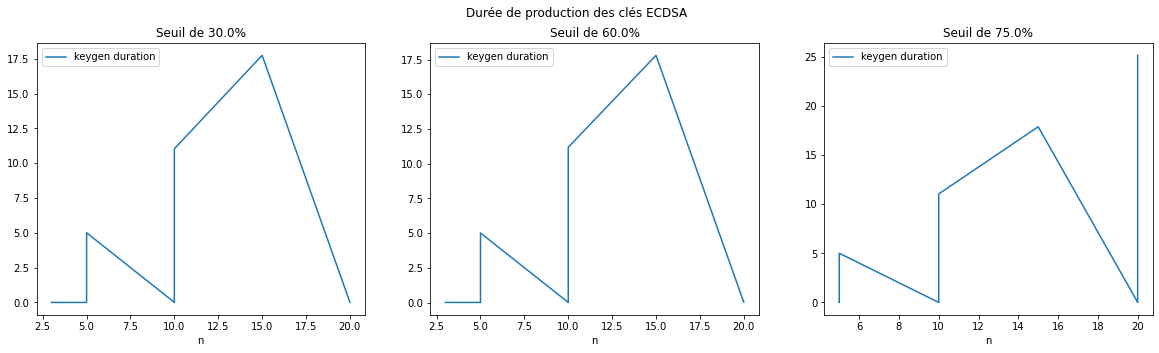

In [14]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(20, 5))
axes=[ax1,ax2,ax3]
fig.suptitle("Durée de production des clés ECDSA")
ssizes_ecdsa=filter_by_threshold(df_ecdsa)

for i in range(len(THRESHOLD_VALUES)):
    ssizes_ecdsa[i].plot("n","keygen duration",ax=axes[i],title=f"Seuil de {THRESHOLD_VALUES[i]*100}%")
    

## Durée de production des signatures

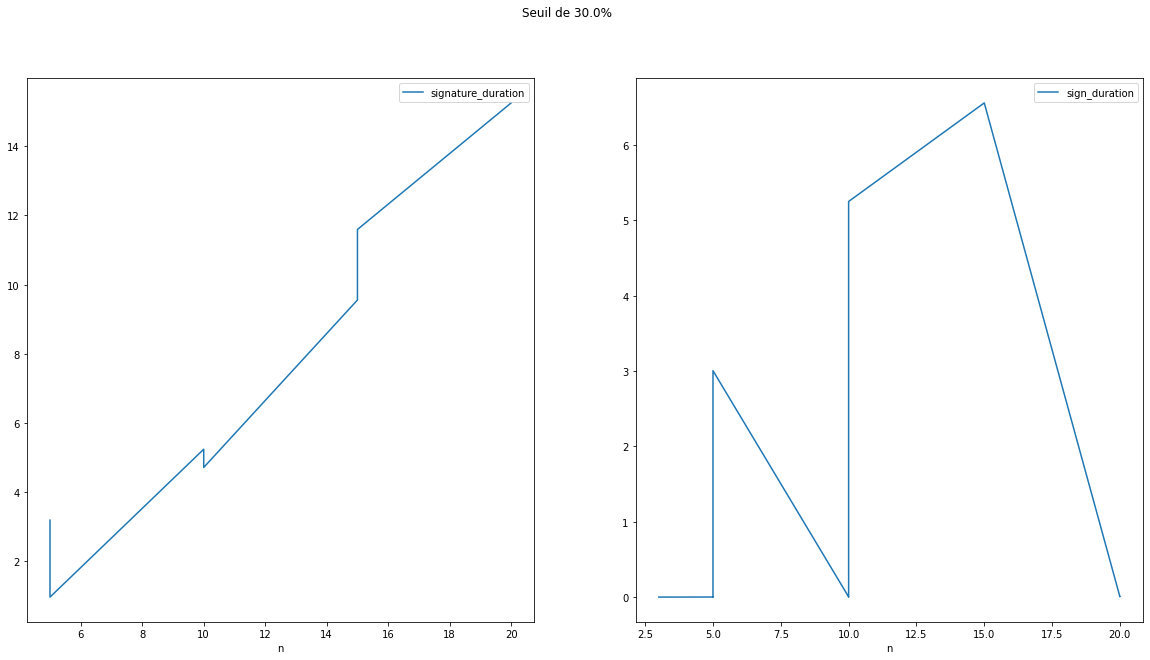

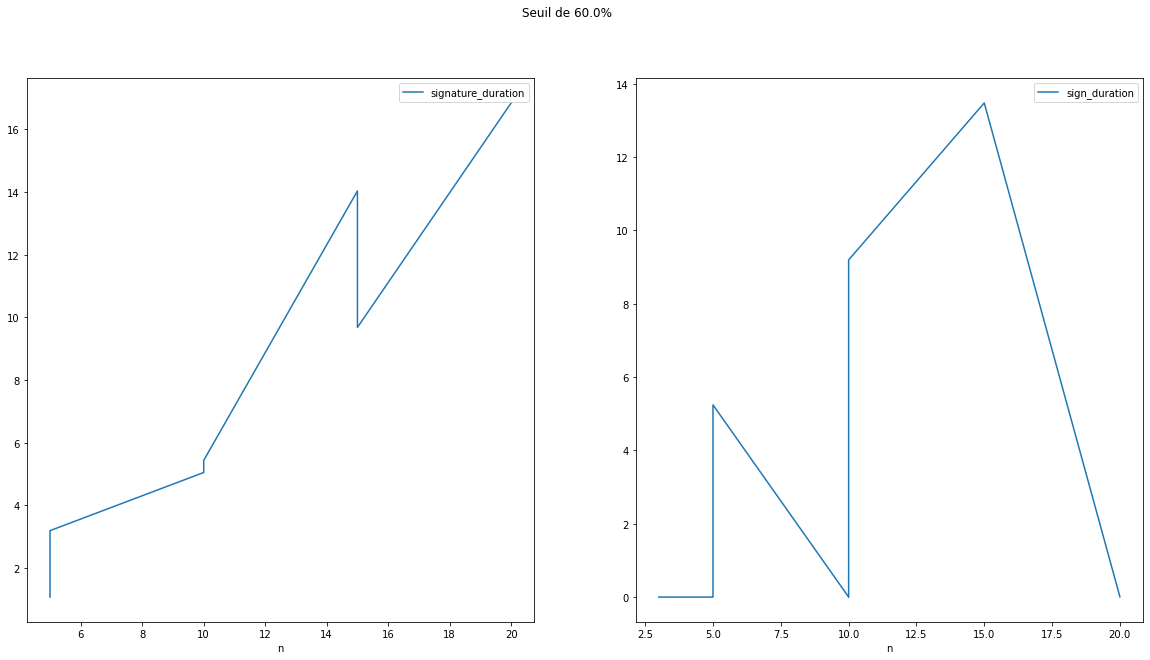

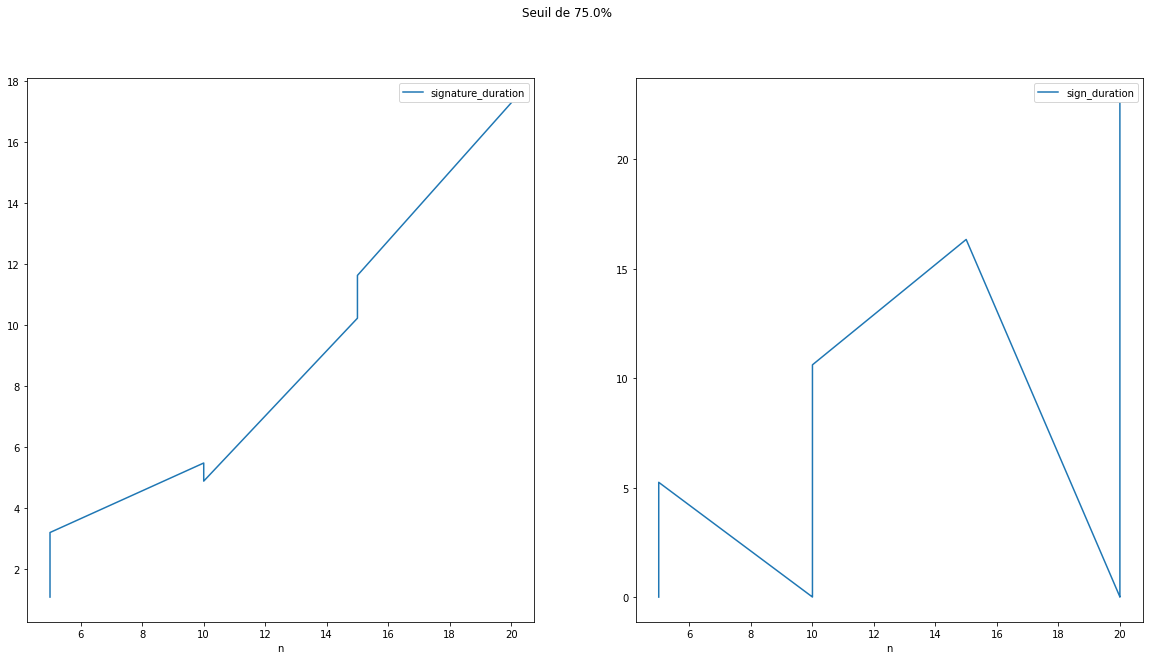

In [13]:
ssizes_bls,ssizes_ecdsa=filter_by_threshold(df_bls),filter_by_threshold(df_ecdsa)

for i in range(len(THRESHOLD_VALUES)):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 10))
    fig.suptitle(f"Seuil de {THRESHOLD_VALUES[i]*100}%")
    ssizes_bls[i].plot("n","signature_duration",ax=ax1)
    ssizes_ecdsa[i].plot("n","sign_duration",ax=ax2)
    

## Durée de vérification des signatures BLS

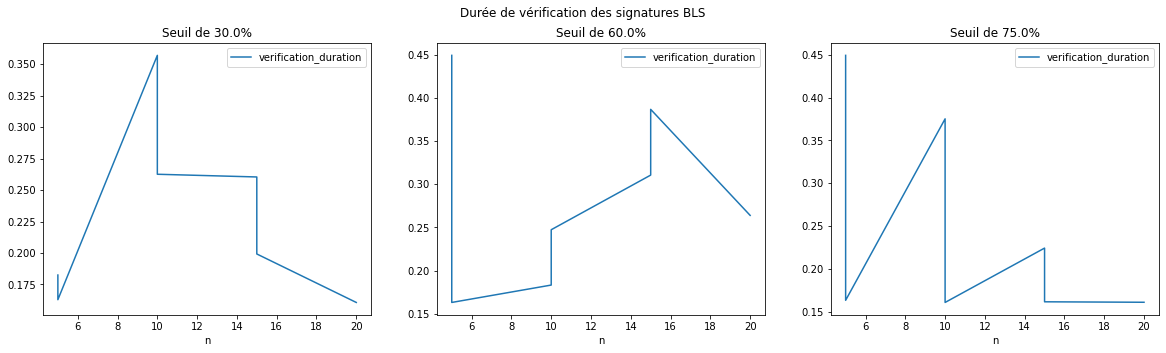

In [18]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(20, 5))
axes=[ax1,ax2,ax3]
fig.suptitle("Durée de vérification des signatures BLS")
ssizes_bls=filter_by_threshold(df_bls)

for i in range(len(THRESHOLD_VALUES)):
    ssizes_bls[i].plot("n","verification_duration",ax=axes[i],title=f"Seuil de {THRESHOLD_VALUES[i]*100}%")
    